In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()

In [2]:
df = pd.read_csv("./050_incidents.csv.zip")
df["collectedAt"] = pd.to_datetime(df["collectedAt"], utc=True)
df.head()

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00.561658+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00.561658+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


# What day of the week has more incidents recorded?
- Show number of incidents per day of week

In [3]:
df["month"] = df.collectedAt.dt.month
df["month_name"] = df.collectedAt.dt.month_name()
df["day"] = df.collectedAt.dt.day
df["day_of_week"] = df.collectedAt.dt.day_of_week
df["day_of_week_name"] = df.collectedAt.dt.day_name()
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.head()

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,month,month_name,day,day_of_week,day_of_week_name,hour,minute
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00.561658+00:00,FRONT ST AT YONGE ST (PX 29),FAR,7,July,14,3,Thursday,12,45
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,7,July,14,3,Thursday,12,45
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00.561658+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,7,July,14,3,Thursday,12,45
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,7,July,14,3,Thursday,12,45
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,7,July,14,3,Thursday,12,45


In [4]:
print(len(df["collectedAt"]))
print(df["collectedAt"].min())
print(df["collectedAt"].max())

31619
2022-07-14 12:45:00.561658+00:00
2023-03-26 21:50:00.004249+00:00


In [5]:
per_dow = df.groupby(["day_of_week","day_of_week_name"]).count().reset_index()
per_dow

,day_of_week,day_of_week_name,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,month,month_name,day,hour,minute
0,0,Monday,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503
1,1,Tuesday,5835,5835,5835,5835,5835,5835,5835,5835,5835,5835,5835,5835,5835,5835,5835
2,2,Wednesday,5888,5888,5888,5888,5888,5888,5888,5888,5888,5888,5888,5888,5888,5888,5888
3,3,Thursday,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500
4,4,Friday,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055
5,5,Saturday,3842,3842,3842,3842,3842,3842,3842,3842,3842,3842,3842,3842,3842,3842,3842
6,6,Sunday,2996,2996,2996,2996,2996,2996,2996,2996,2996,2996,2996,2996,2996,2996,2996


/tmp/ipykernel_15165/396107566.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


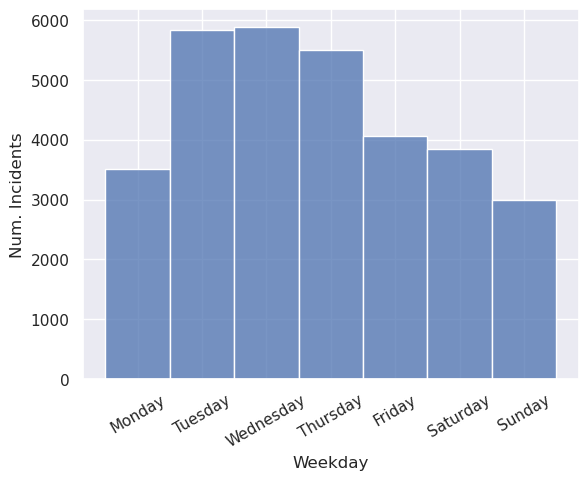

In [6]:
tmp_df = df.sort_values(by="day_of_week")

ax = sns.histplot(data=tmp_df,x="day_of_week_name")
ax.set(ylabel="Num. Incidents", xlabel="Weekday")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.savefig("./plots/010_incidents_per_dow.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/010_incidents_per_dow.png", bbox_inches="tight")
plt.savefig("./plots/010_incidents_per_dow.pdf", bbox_inches="tight")

# What time of day has the most incidents?
- Showing per day of week and time of day

In [7]:
per_hour = df.groupby(["day_of_week","day_of_week_name","hour"]).count().reset_index()
per_hour

,day_of_week,day_of_week_name,hour,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,month,month_name,day,minute
0,0,Monday,0,103,103,103,103,103,103,103,103,103,103,103,103,103,103
1,0,Monday,1,72,72,72,72,72,72,72,72,72,72,72,72,72,72
2,0,Monday,2,35,35,35,35,35,35,35,35,35,35,35,35,35,35
3,0,Monday,3,37,37,37,37,37,37,37,37,37,37,37,37,37,37
4,0,Monday,4,21,21,21,21,21,21,21,21,21,21,21,21,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,6,Sunday,19,159,159,159,159,159,159,159,159,159,159,159,159,159,159
164,6,Sunday,20,157,157,157,157,157,157,157,157,157,157,157,157,157,157
165,6,Sunday,21,208,208,208,208,208,208,208,208,208,208,208,208,208,208
166,6,Sunday,22,233,233,233,233,233,233,233,233,233,233,233,233,233,233


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


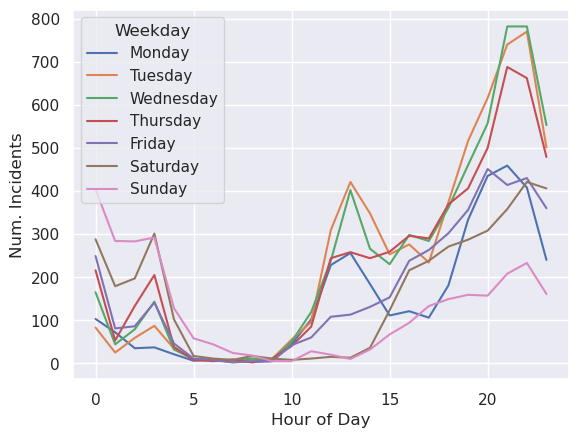

In [8]:
ax = sns.lineplot(data=per_hour,x="hour",y="iconCategory",hue="day_of_week_name")
ax.legend().set_title("Weekday")
ax.set(xlabel="Hour of Day",ylabel="Num. Incidents")

plt.savefig("./plots/010_incidents_per_dow_per_hour.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/010_incidents_per_dow_per_hour.png",bbox_inches="tight")
plt.savefig("./plots/010_incidents_per_dow_per_hour.pdf",bbox_inches="tight")

# What kind of incident is most common?

In [9]:
incident_types = {
    0: "Unknown",
    1: "Accident",
    2: "Fog",
    3: "Dang. Cond.",
    4: "Rain",
    5: "Ice",
    6: "Jam",
    7: "Lane Closed",
    8: "Road Closed",
    9: "Road Works",
    10: "Wind",
    11: "Flooding",
    14: "Broken Down Vehicle"
}

df["incident_type"] = df.apply(lambda x: incident_types[int(x["iconCategory"])], axis=1)
df.head()

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,month,month_name,day,day_of_week,day_of_week_name,hour,minute,incident_type
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00.561658+00:00,FRONT ST AT YONGE ST (PX 29),FAR,7,July,14,3,Thursday,12,45,Jam
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,7,July,14,3,Thursday,12,45,Lane Closed
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00.561658+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,7,July,14,3,Thursday,12,45,Road Works
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,7,July,14,3,Thursday,12,45,Lane Closed
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,7,July,14,3,Thursday,12,45,Road Works


In [10]:
incident_type_hist_order = list(df.groupby("incident_type").count().reset_index().sort_values(by="to", ascending=False)["incident_type"])
df["incident_type_ordered"] = pd.Categorical(df["incident_type"], incident_type_hist_order)
df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,month,month_name,day,day_of_week,day_of_week_name,hour,minute,incident_type,incident_type_ordered
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00.561658+00:00,FRONT ST AT YONGE ST (PX 29),FAR,7,July,14,3,Thursday,12,45,Jam,Jam
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,7,July,14,3,Thursday,12,45,Lane Closed,Lane Closed
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00.561658+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,7,July,14,3,Thursday,12,45,Road Works,Road Works
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,7,July,14,3,Thursday,12,45,Lane Closed,Lane Closed
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00.561658+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,7,July,14,3,Thursday,12,45,Road Works,Road Works
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00.005825+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,3,March,26,6,Sunday,21,0,Jam,Jam
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00.006949+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,3,March,26,6,Sunday,21,25,Jam,Jam
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00.004659+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,3,March,26,6,Sunday,21,30,Jam,Jam
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00.003848+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,3,March,26,6,Sunday,21,45,Jam,Jam


/tmp/ipykernel_31866/837297918.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


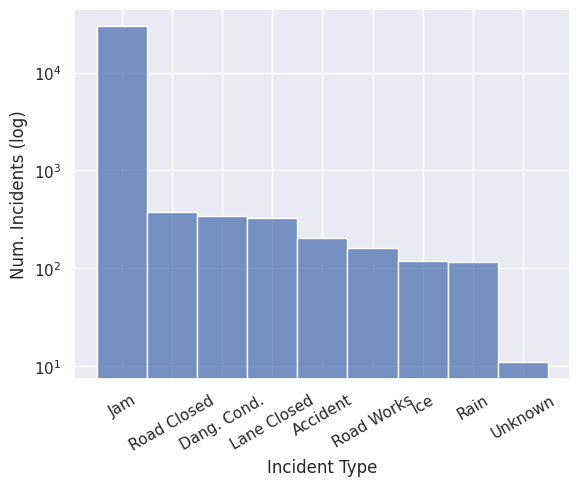

In [11]:
ax = sns.histplot(data=df, x="incident_type_ordered")
ax.set(ylabel="Num. Incidents (log)", yscale="log", xlabel="Incident Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.savefig("./plots/010_incident_type_histogram.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/010_incident_type_histogram.png", bbox_inches="tight")
plt.savefig("./plots/010_incident_type_histogram.pdf", bbox_inches="tight")

# Average and median length of congestion per incident type

## Average

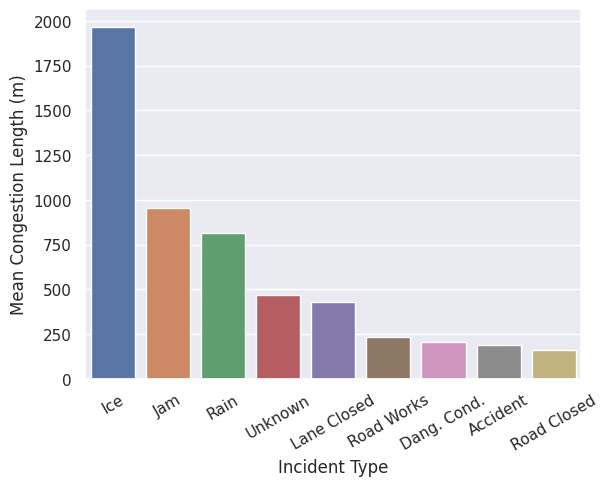

In [24]:
avg_len_per_incident_type_order = list(df[["length","incident_type"]].groupby("incident_type").mean().reset_index().sort_values(by="length", ascending=False)["incident_type"])
avg_len_per_incident_type = df[["incident_type", "length"]].groupby("incident_type").mean().reset_index()

ax = sns.barplot(data=avg_len_per_incident_type, x="incident_type", y="length", order=avg_len_per_incident_type_order)
ax.set(ylabel="Mean Congestion Length (m)", xlabel="Incident Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.savefig("./plots/010_mean_congestion_length.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/010_mean_congestion_length.png", bbox_inches="tight")
plt.savefig("./plots/010_mean_congestion_length.pdf", bbox_inches="tight")

## Median

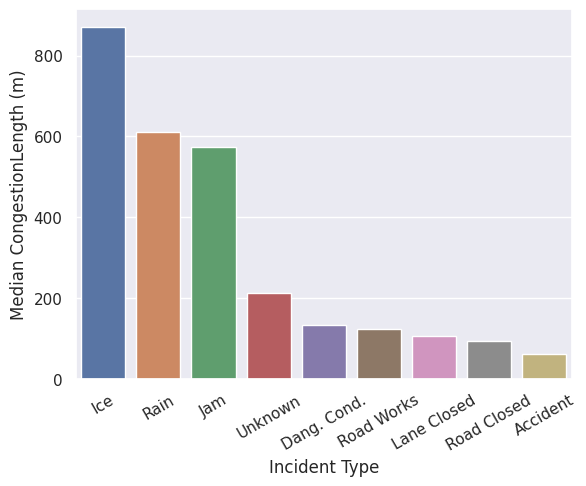

In [25]:
med_len_per_incident_type_order = list(df[["length","incident_type"]].groupby("incident_type").median().reset_index().sort_values(by="length", ascending=False)["incident_type"])
med_len_per_incident_type = df[["incident_type", "length"]].groupby("incident_type").median().reset_index()

ax = sns.barplot(data=med_len_per_incident_type, x="incident_type", y="length", order=med_len_per_incident_type_order)
ax.set(ylabel="Median CongestionLength (m)", xlabel="Incident Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.savefig("./plots/010_median_congestion_length.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/010_median_congestion_length.png", bbox_inches="tight")
plt.savefig("./plots/010_median_congestion_length.pdf", bbox_inches="tight")

# Average and median delay caused per incident type

## Average

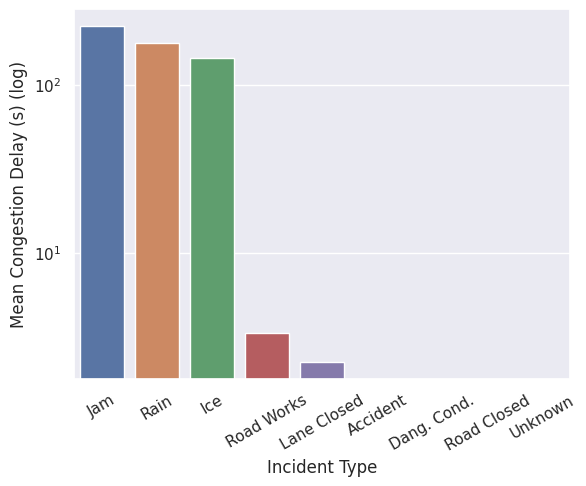

In [26]:
avg_delay_per_incident_type_order = list(df[["incident_type", "delay"]].groupby("incident_type").mean().reset_index().sort_values(by="delay", ascending=False)["incident_type"])
avg_delay_per_incident_type = df[["incident_type", "delay"]].groupby("incident_type").mean().reset_index()

ax = sns.barplot(data=avg_delay_per_incident_type, x="incident_type", y="delay", order=avg_delay_per_incident_type_order)
ax.set(ylabel="Mean Congestion Delay (s) (log)", xlabel="Incident Type", yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.savefig("./plots/010_mean_congestion_delay.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/010_mean_congestion_delay.png", bbox_inches="tight")
plt.savefig("./plots/010_mean_congestion_delay.pdf", bbox_inches="tight")

## Median

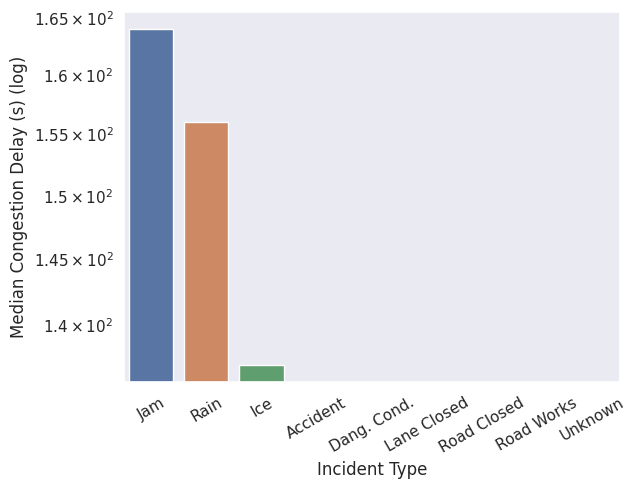

In [27]:
median_delay_per_incident_type_order = list(df[["incident_type", "delay"]].groupby("incident_type").median().reset_index().sort_values(by="delay", ascending=False)["incident_type"])
median_delay_per_incident_type = df[["incident_type", "delay"]].groupby("incident_type").median().reset_index()

ax = sns.barplot(data=median_delay_per_incident_type, x="incident_type", y="delay", order=median_delay_per_incident_type_order)
ax.set(ylabel="Median Congestion Delay (s) (log)", xlabel="Incident Type", yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.savefig("./plots/010_median_congestion_delay.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/010_median_congestion_delay.png", bbox_inches="tight")
plt.savefig("./plots/010_median_congestion_delay.pdf", bbox_inches="tight")

# Correlations

In [33]:
data_to_correlate = df[["iconCategory", "magnitudeOfDelay", "length", "delay", "hour"]]
corr_mat = data_to_correlate.corr()

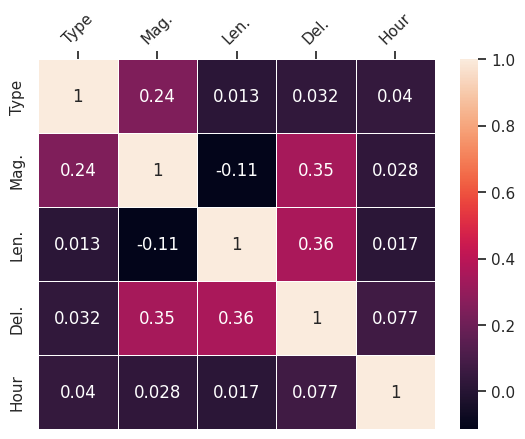

In [34]:
labels=["Type", "Mag.", "Len.", "Del.", "Hour"]

ax = sns.heatmap(corr_mat,annot=True,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/010_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/010_correlations.png", bbox_inches="tight")
plt.savefig("./plots/010_correlations.pdf", bbox_inches="tight")

In [65]:
df.drop(["month","day","day_of_week","day_of_week_name","hour", "minute"], inplace=True, axis=1)

In [67]:
df.to_csv("./050_incidents.csv.zip", index=False, compression="zip")